<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/CircuitElement_capacitance_frequency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Frequency Response of Capacitance</h1></b>

Dr. Bingsen Wang

6/18/2023
</center>

#Voltage and Current of Capacitance

The relationship between the voltage $v_C$ across a capacitance and the current $i_C$ through the capacitance with $v_C$ and $i_C$ following the **passive sign convention** can be described by
$$\begin{align}
i_C &= C\frac{dv_C}{dt} \tag{1}\\
v_C &= \frac{1}{C}\int i_Cdt=v_C(t_0)+\frac{1}{C}\int_{t_0}^t i_C(\tau)d\tau\tag{2}
\end{align} $$

#Instantaneous Power

The instantaneous power $p(t)$ delivered to the capacitance is
$$p(t)=v_Ci_C \tag{3}$$

Substituting (1) in (3) yields
$$p(t) = {C\over 2}\frac{dv_C^2}{dt}\tag{4}$$

Substituting (2) in (3) leads to
$$p(t) = \frac{i_C}{C}\int i_C dt\tag{5}$$

Equations (3)-(5) can be used to determine the instantaneous power delivered to a capacitance although equation (5) is much less frequently used.

#Frequency Response

Let the current $i_C$ be sinisoudal
$$i_C = I_C\cos(\omega t)\tag{6}$$

Subtsituting (6) in (2) yields
$$v_C = \frac{I_C}{\omega C}\sin(\omega t) \tag{7}$$

#Python Code
The Python code illustrates the resistance using ac waveforms.

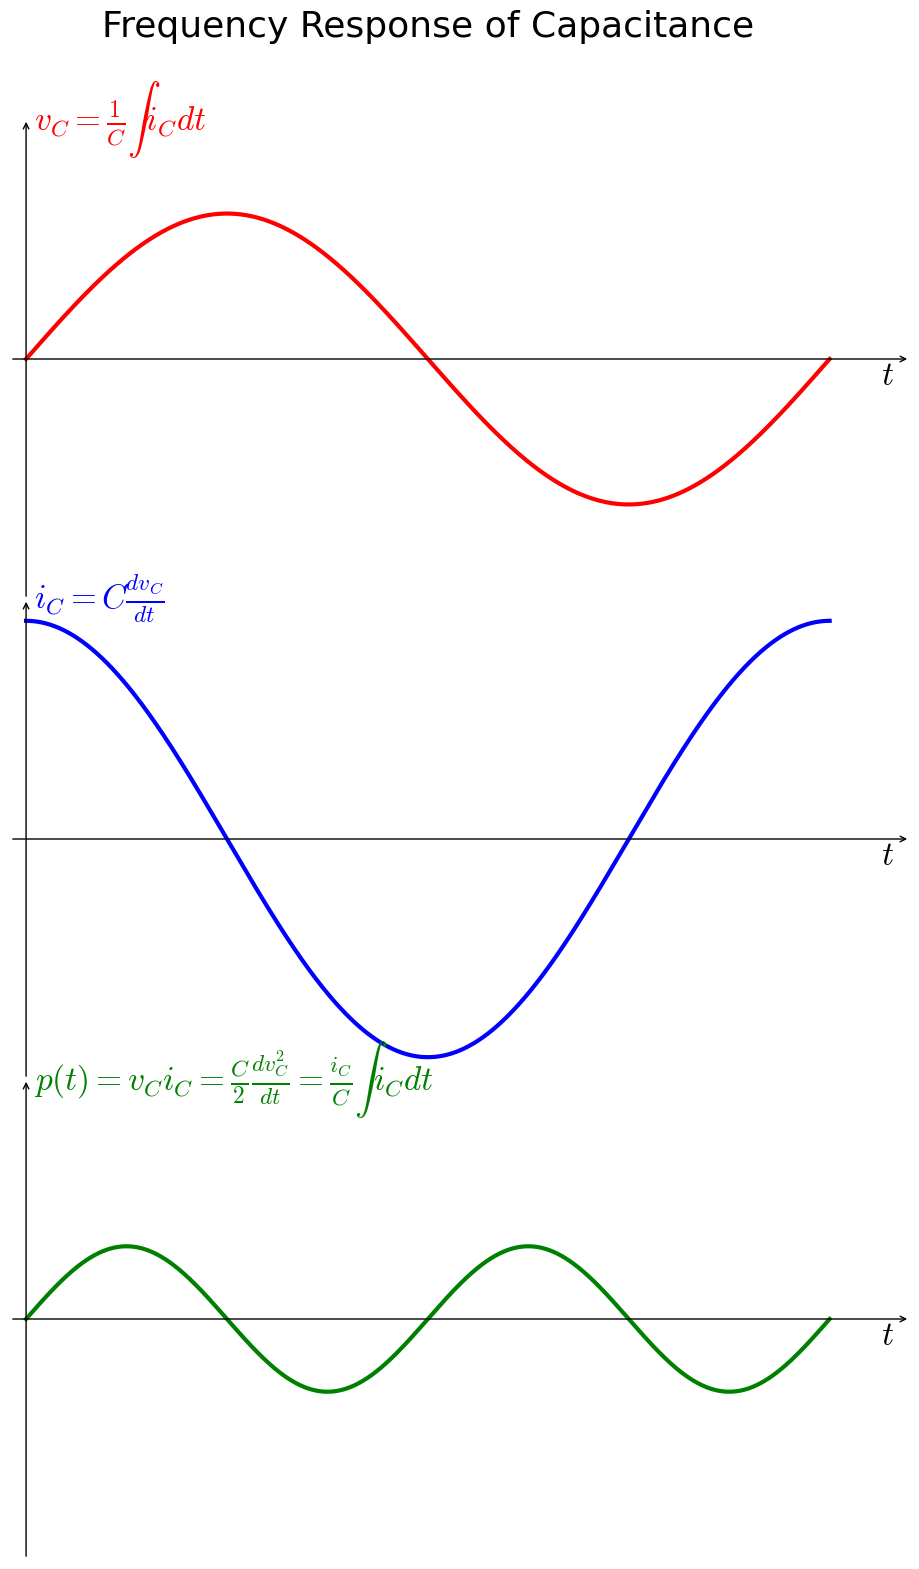

In [ ]:
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

#parameters
Nfpp = 160
Nf = 2*Nfpp
t=linspace(0,1,2048)
f = linspace(1,5,Nfpp).tolist()+linspace(5,1,Nfpp).tolist()

fig = plt.figure(figsize=(9,16))
fig.tight_layout()
ax_frame = [[[0,.6, 1, .3],[-.02,1.1],[-1.1,1.1]], #amplitude
            [[0,.3, 1, .3],[-.02,1.1],[-1.1,1.1]], #phase
            [[0,0, 1, .3],[-.02,1.1],[-1.1,1.1]], #frequency
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[[r'$v_C = \frac{1}{C}\int i_C dt $', '$t$'],
        [r'$i_C = C\frac{dv_C}{dt}$', '$t$'],
        [r'$p(t) = v_Ci_C = \frac{C}{2}\frac{dv_C^2}{dt}=\frac{i_C}{C}\int i_C dt$', '$t$'],
        ] #variables for yx axes of each subplot
clst=['r','b','g'] #colors of lines
ax_lst=[] #axis list or the list of subplots
lines = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  lines.append(ax.plot([], [], color=clst[k], lw=3)[0]) #lines to plot
  ax.text(xm-.02,0,ax_lbl[k][-1],size=24,va='top',ha='right') #x-axis label
  ax.text(0.01,ym,ax_lbl[k][0],size=24,va='center',color=clst[k]) #y label
ax_lst[0].text(0.5,ax_frame[0][2][1]+0.5,'Frequency Response of Capacitance',va='top',ha='center',size=26)
# animation function. This is called sequentially
def animate(i):
  iC = cos(2*pi*f[i]*t)
  C=1.5/(2*pi)
  vC=1/(2*pi*f[i]*C)*sin(2*pi*f[i]*t)
  pt=vC*iC
  lines[0].set_data(t,vC)
  lines[1].set_data(t,iC)
  lines[2].set_data(t,pt)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = "circuitElement_capacitanceFR.mp4"
writervideo = animation.FFMpegWriter(fps=40)
anim.save(fn, writer=writervideo,dpi = 120)
